In [14]:
import glob
import os
import csv
import itertools
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.DataStructs import FingerprintSimilarity
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [15]:
info = {}

target = 'RKC' # Change this to your target name

# Locate SDF file
path = glob.glob('{}'.format(os.getcwd())+f'/{target}*.sdf')
sdf_path = path[0]

# Load molecular data using SDMolSupplier
suppl = Chem.SDMolSupplier(sdf_path)


dict = {}
name_list = [mol.GetProp('_Name') for mol in suppl]

for i in range(len(suppl)):
    name = suppl[i].GetProp('_Name')
    fp = AllChem.GetMorganFingerprintAsBitVect(suppl[i], radius=2, nBits = 124, bitInfo=info)
    vector = np.array(fp)
    dict[name] = vector

Initialization complete
Iteration 0, inertia 75.65638966077569.
Iteration 1, inertia 63.36054323025496.
Iteration 2, inertia 58.61203399024036.
Iteration 3, inertia 56.523229832556424.
Iteration 4, inertia 56.02753849314567.
Iteration 5, inertia 55.68301653855532.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 88.60702654153133.
Iteration 1, inertia 59.7445795245655.
Iteration 2, inertia 57.833033687399784.
Iteration 3, inertia 57.28101348997145.
Iteration 4, inertia 57.124628491797736.
Iteration 5, inertia 56.03159518008497.
Iteration 6, inertia 55.32101094623924.
Iteration 7, inertia 55.07516684618969.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 81.30931798098999.
Iteration 1, inertia 72.98212892133694.
Iteration 2, inertia 69.51560226290229.
Iteration 3, inertia 65.83983707548242.
Iteration 4, inertia 61.662778161589635.
Iteration 5, inertia 57.38330997325417.
Iteration 6, inertia 56.233407830

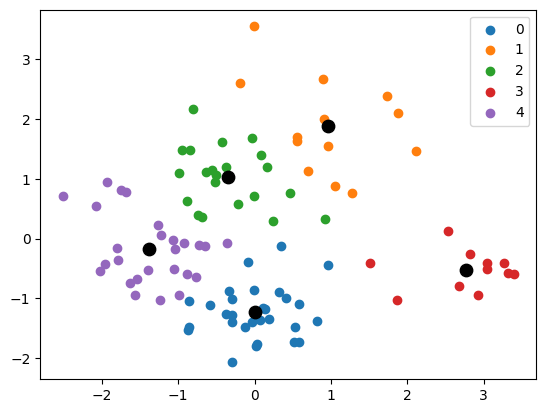

In [17]:


# Replace this with your actual data loading process
data = []
for i in range(len(suppl)):
    name = suppl[i].GetProp('_Name')
    fp = AllChem.GetMorganFingerprintAsBitVect(suppl[i], radius=2, nBits=124)
    vector = np.array(fp)
    data.append([name] + vector.tolist())

# Create a DataFrame with fp and molecule names
columns = ['Name'] + [f'Bit_{i}' for i in range(124)]

data_frame = pd.DataFrame(data, columns=columns) # Name + bits 

# Select only the fingerprint bits columns for clustering
X = data_frame.iloc[:, 1:].values

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
df = pca.fit_transform(X) # array with PCA_1 and PCA_2 (coordinates for each molecule)

# print(df.shape) (100,2)

# Apply k-means clustering
num_clusters = 5
kmeans = KMeans(n_init = 500, n_clusters=num_clusters, verbose=2, random_state = 42)

label = kmeans.fit_predict(df) 
# label (cluster assigned) for each molecule giving the coordinates (PCA_1 and PCA_2)
# Compute cluster centers and predict cluster index for each sample.


#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label) # this is the same as doing i in range(num_clusters)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i) # plot label i with coordinates X(first column or 0 ) and Y (second column or 1) use labels i 
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k') # plot all centroids 
plt.legend()
plt.show()

In [20]:
data_frame['cluster'] = label
data_frame = data_frame[['Name','cluster']]
data_frame.to_csv(f'{target}_csv.csv', index=False)



,Name,cluster
0,HMDB0000058,1
1,HMDB0000343,2
2,HMDB0000372,2
3,HMDB0000406,2
4,HMDB0000416,2
...,...,...
95,HMDB0006061,0
96,HMDB0006101,4
97,HMDB0006203,1
98,HMDB0006217,1


In [21]:
df_final = data_frame
df_final.to_csv('test_csv.csv', index=False)

for i in u_labels:
    cluster_indices = np.where(label == i)[0]
    cluster_names = df_final.loc[cluster_indices, 'Name']
    print(f"Cluster {i+1} Centroid: {centroids[i]}")
    print(f"Cluster {i+1} Molecule Names: {cluster_names.tolist()}")

Cluster 1 Centroid: [ 0.01074033 -1.23191127]
Cluster 1 Molecule Names: ['HMDB0000512', 'HMDB0000594', 'HMDB0000667', 'HMDB0000671', 'HMDB0000706', 'HMDB0000715', 'HMDB0000763', 'HMDB0000842', 'HMDB0000860', 'HMDB0000881', 'HMDB0000929', 'HMDB0001389', 'HMDB0001510', 'HMDB0001894', 'HMDB0001925', 'HMDB0002096', 'HMDB0002114', 'HMDB0002302', 'HMDB0002372', 'HMDB0003066', 'HMDB0003306', 'HMDB0003324', 'HMDB0003572', 'HMDB0003573', 'HMDB0004185', 'HMDB0004808', 'HMDB0004810', 'HMDB0006005', 'HMDB0006061']
Cluster 2 Centroid: [0.9575277  1.88066976]
Cluster 2 Molecule Names: ['HMDB0000058', 'HMDB0000637', 'HMDB0000722', 'HMDB0000874', 'HMDB0001054', 'HMDB0001204', 'HMDB0001570', 'HMDB0003141', 'HMDB0003218', 'HMDB0004484', 'HMDB0006203', 'HMDB0006217', 'HMDB0006218']
Cluster 3 Centroid: [-0.34727506  1.03089963]
Cluster 3 Molecule Names: ['HMDB0000343', 'HMDB0000372', 'HMDB0000406', 'HMDB0000416', 'HMDB0000431', 'HMDB0001000', 'HMDB0001091', 'HMDB0001518', 'HMDB0001849', 'HMDB0002780', 'HM